In [13]:
import torch 
import numpy 
import matplotlib.pyplot as plt 
from torchvision import datasets, transforms
import torch.nn as nn 
import torch.nn.functional as F 


In [2]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
print(torch.cuda.get_device_name())

NVIDIA GeForce GTX 1650


In [3]:
print('pytorch_version', torch.__version__, 'DEVICE', DEVICE)

pytorch_version 1.12.0 DEVICE cuda


In [4]:
BATCH_SIZE = 32
EPOCHS = 10

In [6]:
from random import shuffle


train_dataset = datasets.MNIST(root='../../data/MNIST/',
                               train=True,
                               download=True,
                               transform=transforms.ToTensor())

test_dataset = datasets.MNIST(root='../../data/MNIST/',
                              train=False,
                              download=True,
                              transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           shuffle=True,
                                           batch_size=BATCH_SIZE)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          shuffle=False,
                                          batch_size=BATCH_SIZE)
                                          


In [7]:
for (X_train, y_train) in train_loader:
    print('X_train: ', X_train.size(), 'y_train: ', y_train.size())
    print('X_train: ', X_train.type(), 'y_train: ', y_train.type())
    break

X_train:  torch.Size([32, 1, 28, 28]) y_train:  torch.Size([32])
X_train:  torch.FloatTensor y_train:  torch.LongTensor


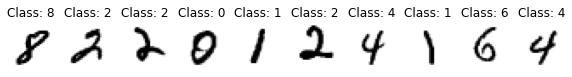

In [12]:
pltsize= 1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap='gray_r')
    plt.title('Class: ' + str(y_train[i].item()))

In [77]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x

In [120]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2, momentum=0.5)
criterion = nn.CrossEntropyLoss()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [121]:
def train(model, train_loader, optimizer, log_interval=100):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()


        # if batch_idx % log_interval == 0:
        #     print(f'Train_EPOCH: {Epoch}, [{batch_idx*len(image)} / {len(train_loader.dataset)} ({(100. * batch_idx / len(train_loader)):.0f}%)]\tTrain_Loss : {(loss.item()):.6f}')

In [122]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
        
    test_loss /= len(test_loader)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy


In [126]:
EPOCHS = 30
best_accuracy = 0
for Epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, 100)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print(f'\n[EPOCH: {Epoch}, \tTest_LOSS: {(test_loss):.4f}, \tTest_Accuracy: {(test_accuracy):.2f} %\n')

    if test_accuracy > best_accuracy:
        best_accuracy  = test_accuracy
        best_model = model

print('최고성능: ', f'{(best_accuracy):.2f}')

C:\Users\Admin\AppData\Local\Temp\ipykernel_26516\2480806586.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)



[EPOCH: 1, 	Test_LOSS: 0.3055, 	Test_Accuracy: 91.27 %


[EPOCH: 2, 	Test_LOSS: 0.2241, 	Test_Accuracy: 93.50 %


[EPOCH: 3, 	Test_LOSS: 0.1861, 	Test_Accuracy: 94.58 %


[EPOCH: 4, 	Test_LOSS: 0.1580, 	Test_Accuracy: 95.31 %


[EPOCH: 5, 	Test_LOSS: 0.1309, 	Test_Accuracy: 96.16 %


[EPOCH: 6, 	Test_LOSS: 0.1155, 	Test_Accuracy: 96.51 %


[EPOCH: 7, 	Test_LOSS: 0.1077, 	Test_Accuracy: 96.57 %


[EPOCH: 8, 	Test_LOSS: 0.0949, 	Test_Accuracy: 97.06 %


[EPOCH: 9, 	Test_LOSS: 0.0879, 	Test_Accuracy: 97.32 %


[EPOCH: 10, 	Test_LOSS: 0.0809, 	Test_Accuracy: 97.46 %


[EPOCH: 11, 	Test_LOSS: 0.0764, 	Test_Accuracy: 97.57 %


[EPOCH: 12, 	Test_LOSS: 0.0765, 	Test_Accuracy: 97.68 %


[EPOCH: 13, 	Test_LOSS: 0.0698, 	Test_Accuracy: 97.73 %


[EPOCH: 14, 	Test_LOSS: 0.0693, 	Test_Accuracy: 97.85 %


[EPOCH: 15, 	Test_LOSS: 0.0670, 	Test_Accuracy: 97.82 %


[EPOCH: 16, 	Test_LOSS: 0.0666, 	Test_Accuracy: 97.93 %


[EPOCH: 17, 	Test_LOSS: 0.0697, 	Test_Accuracy: 97.69 %


[EPOCH: 18, 	Test_LOSS

In [128]:
best_model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0090, -0.0199, -0.0341,  ...,  0.0279, -0.0219,  0.0080],
                      [ 0.0112, -0.0132,  0.0138,  ..., -0.0200, -0.0149, -0.0194],
                      [-0.0200,  0.0142,  0.0053,  ...,  0.0140,  0.0019,  0.0294],
                      ...,
                      [ 0.0276,  0.0231, -0.0105,  ..., -0.0200,  0.0175,  0.0052],
                      [ 0.0226, -0.0116,  0.0239,  ...,  0.0140, -0.0340,  0.0145],
                      [-0.0044, -0.0178, -0.0173,  ..., -0.0209, -0.0246,  0.0335]],
                     device='cuda:0')),
             ('fc1.bias',
              tensor([-1.9652e-02, -3.4465e-02,  3.6073e-02, -5.7925e-02,  1.8408e-02,
                       5.5491e-02, -2.6466e-02, -2.7307e-02, -2.7411e-02,  1.5681e-02,
                       7.5617e-02,  4.1002e-03,  1.6976e-02,  7.7890e-02,  3.7559e-02,
                      -5.3283e-03,  4.8634e-02,  7.4346e-03, -1.5548e-02,  2.4479e-02,
                       1.0

In [119]:
del model